### Interpolations.jl
We use Interpolations.jl for splines

In [1]:
using Pkg
Pkg.activate("..") ## because we have environment files in the parent directory
Pkg.instantiate() ## to download all missing packages


  Activating project at `c:\Users\piotr\Dropbox\WNE\QuantEcon_all\QEcon2023\Code`


In [2]:
# load some packages we will need today
using Interpolations, Plots

## Simple example
We start with a simple example of monomial basis.

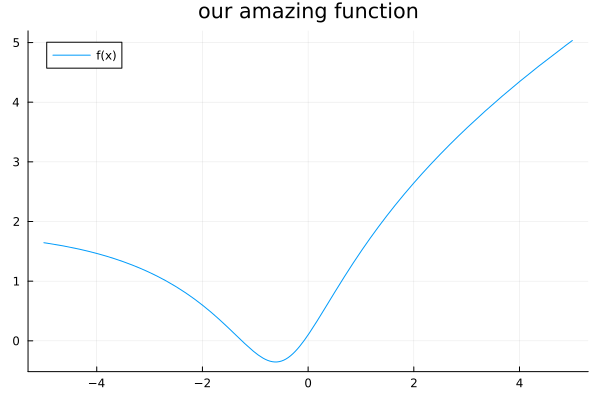

In [3]:
# test function
f1(x) = log(x^2+x + 1) + 0.3*x + 0.1
# plot it to see what happens
plot(f1, -5, 5, label="f(x)", legend=:topleft, title = "our amazing function")

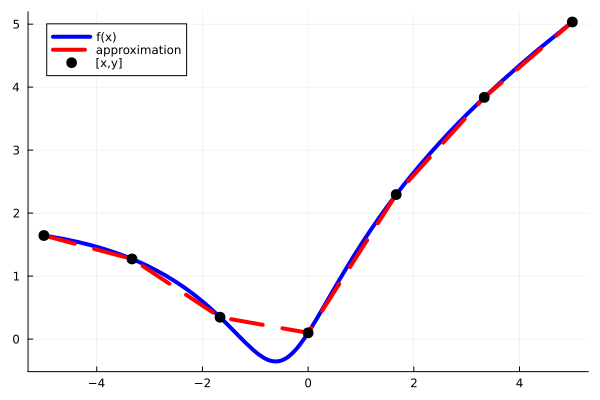

In [10]:
# create grid
xs = LinRange(-5,5,7)
# evaluate function on grid
ys = f1.(xs)
# interpolation step
itp = linear_interpolation(xs,ys,extrapolation_bc=Flat())

# create a new function 
f1_interp(x) = itp(x)

plot(f1, -5, 5, label="f(x)", legend=:topleft,color = :blue,linewidth=4)
plot!(f1_interp,-5,5, label="approximation", legend=:topleft,color = :red,linestyle=:dash,linewidth=4)
scatter!(xs,ys, label="[x,y]", legend=:topleft,color = :black,ms=6)

In [11]:
# evaluate outside of the grid
f1_interp(-30)

BoundsError: BoundsError: attempt to access 7-element extrapolate(scale(interpolate(::Vector{Float64}, BSpline(Linear())), (LinRange{Float64}(-5.0, 5.0, 7),)), Throw()) with element type Float64 at index [-30]

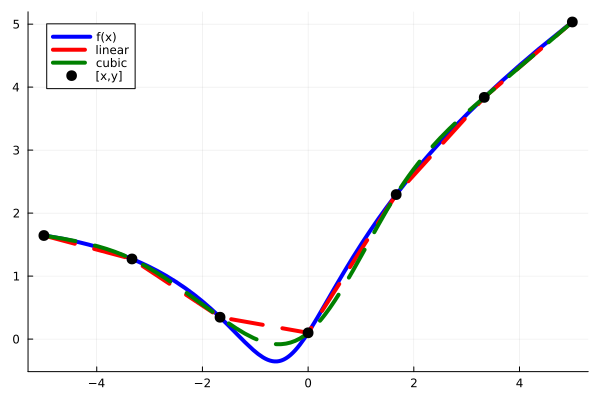

In [12]:

itp = linear_interpolation(xs,ys)
f1_interp(x) = itp(x)
itp_2 = cubic_spline_interpolation(xs,ys)
f1_interp_2(x) = itp_2(x)

plot(f1, -5, 5, label="f(x)", legend=:topleft,color = :blue,linewidth=4)
plot!(f1_interp,-5,5, label="linear", legend=:topleft,color = :red,linestyle=:dash,linewidth=4)
plot!(f1_interp_2,-5,5, label="cubic", legend=:topleft,color = :green,linestyle=:dash,linewidth=4)
scatter!(xs,ys, label="[x,y]", legend=:topleft,color = :black,ms=6)


## Runge again


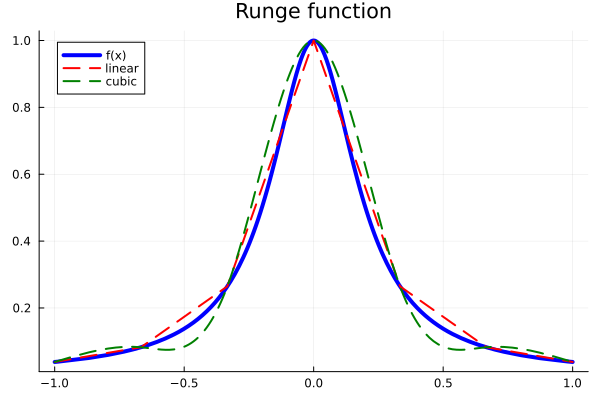

In [13]:
# evaluate
runge(x) = 1/(1+25x^2)

# create grid
xs = LinRange(-1,1,7)
# evaluate function on grid
ys = runge.(xs)
# interpolation step
itp = linear_interpolation(xs,ys)
runge_interp_linear(x) = itp(x)
itp2 = cubic_spline_interpolation(xs,ys)
runge_interp_cubic(x) = itp2(x)

my_plot = plot(runge, -1, 1, label="f(x)", legend=:topleft,color = :blue,linewidth = 4,title = "Runge function")
plot!(runge_interp_linear, -1, 1, label="linear", legend=:topleft,color = :red,linestyle=:dash,linewidth = 2)
plot!(runge_interp_cubic, -1, 1, label="cubic", legend=:topleft,color = :green,linestyle=:dash,linewidth = 2)

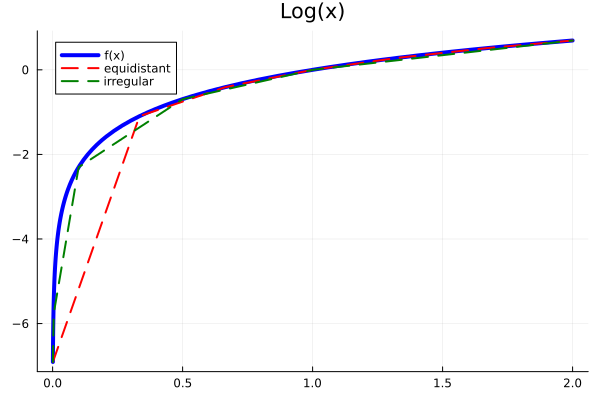

In [14]:
f2(x) = log(x)
plot(f2,0,0.1)

xs1 = LinRange(0.001,2,7)
ys1 = f2.(xs1)
itp1 = linear_interpolation(xs1,ys1)
log_interp1(x) = itp1(x)

xs2 = [0.001,0.002,0.003,0.1,0.5,1,2]
ys2 = f2.(xs2)
itp2 = linear_interpolation(xs2,ys2)
log_interp2(x) = itp2(x)

my_plot2 = plot(f2, 0.001, 2, label="f(x)", legend=:topleft,color = :blue,linewidth = 4,title = "Log(x)")
plot!(log_interp1,  0.001, 2, label="equidistant", legend=:topleft,color = :red,linestyle=:dash,linewidth = 2)
plot!(log_interp2,  0.001, 2, label="irregular", legend=:topleft,color = :green,linestyle=:dash,linewidth = 2)